In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [53]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [54]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\기획재정부_월별 지출집행 상황 정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 지출집행 상황 정보\\재정사업 집행실적(월별집행실적)_20230208055831.xlsx',
 'G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\기획재정부_월별 지출집행 상황 정보\\재정사업 집행실적(월별집행실적)_20230208055831.csv']

In [56]:
origin_df = pd.read_csv(files[1],encoding='cp949')
df = pd.DataFrame(origin_df.loc[1:].values,columns=origin_df.loc[0].values)
df.head()

,회계연도,집행월,소관명,회계명,분야명,부문명,프로그램명,단위사업명,세부사업명,예산액,예산현액,집행액(당월),집행액(연누계)
0,2022,12,5·18민주화운동 진상규명조사위원회,일반회계,일반·지방행정,일반행정,518 진상규명조사위원회 운영,518 진상규명 지원,518 진상규명지원,"5,452","5,933","1,958","4,337"
1,2022,12,5·18민주화운동 진상규명조사위원회,일반회계,일반·지방행정,일반행정,518 진상규명조사위원회 운영,기본경비,위원회 기본경비,"4,421","4,421",519,"4,251"
2,2022,12,5·18민주화운동 진상규명조사위원회,일반회계,일반·지방행정,일반행정,518 진상규명조사위원회 운영,인건비,공무원 인건비,"3,860","3,860",315,"3,532"
3,2022,12,가습기살균제사건과 4·16세월호참사 특별조사위원회,일반회계,일반·지방행정,일반행정,기관운영,기본경비,기관운영 기본경비(비총액),"3,086","3,306",-28,"2,557"
4,2022,12,가습기살균제사건과 4·16세월호참사 특별조사위원회,일반회계,일반·지방행정,일반행정,기관운영,기본경비,기관운영 기본경비(총액),"1,690","1,690",-108,"1,262"


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8822 entries, 0 to 8821
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   회계연도      8822 non-null   object
 1   집행월       8822 non-null   object
 2   소관명       8822 non-null   object
 3   회계명       8822 non-null   object
 4   분야명       8822 non-null   object
 5   부문명       8822 non-null   object
 6   프로그램명     8822 non-null   object
 7   단위사업명     8822 non-null   object
 8   세부사업명     8822 non-null   object
 9   예산액       8822 non-null   object
 10  예산현액      8822 non-null   object
 11  집행액(당월)   8822 non-null   object
 12  집행액(연누계)  8822 non-null   object
dtypes: object(13)
memory usage: 896.1+ KB


In [59]:
cols = ['예산액','예산현액','집행액(당월)','집행액(연누계)']
for c in cols:
    df[c] = df[c].apply(lambda x : "".join(re.findall(r'([^,]+)',x)))

In [60]:
df.head()

,회계연도,집행월,소관명,회계명,분야명,부문명,프로그램명,단위사업명,세부사업명,예산액,예산현액,집행액(당월),집행액(연누계)
0,2022,12,5·18민주화운동 진상규명조사위원회,일반회계,일반·지방행정,일반행정,518 진상규명조사위원회 운영,518 진상규명 지원,518 진상규명지원,5452,5933,1958,4337
1,2022,12,5·18민주화운동 진상규명조사위원회,일반회계,일반·지방행정,일반행정,518 진상규명조사위원회 운영,기본경비,위원회 기본경비,4421,4421,519,4251
2,2022,12,5·18민주화운동 진상규명조사위원회,일반회계,일반·지방행정,일반행정,518 진상규명조사위원회 운영,인건비,공무원 인건비,3860,3860,315,3532
3,2022,12,가습기살균제사건과 4·16세월호참사 특별조사위원회,일반회계,일반·지방행정,일반행정,기관운영,기본경비,기관운영 기본경비(비총액),3086,3306,-28,2557
4,2022,12,가습기살균제사건과 4·16세월호참사 특별조사위원회,일반회계,일반·지방행정,일반행정,기관운영,기본경비,기관운영 기본경비(총액),1690,1690,-108,1262


In [61]:
df = df.astype({'예산액':'int','예산현액':'int','집행액(당월)':'int','집행액(연누계)':'int'})

In [62]:
df.describe()

,예산액,예산현액,집행액(당월),집행액(연누계)
count,8.822000e+03,8.822000e+03,8.822000e+03,8.822000e+03
mean,1.308117e+05,1.315665e+05,1.372069e+04,1.298989e+05
std,1.941009e+06,1.941101e+06,2.526995e+05,1.892158e+06
min,-7.645000e+03,-7.645000e+03,-2.993370e+05,0.000000e+00
25%,8.100000e+02,8.630000e+02,0.000000e+00,6.820000e+02
50%,4.000000e+03,4.152000e+03,4.700000e+01,3.655500e+03
75%,1.672075e+04,1.731625e+04,7.477500e+02,1.540375e+04
max,9.119173e+07,9.119173e+07,1.512380e+07,8.620000e+07


In [63]:
df.describe(include=np.object)

,회계연도,집행월,소관명,회계명,분야명,부문명,프로그램명,단위사업명,세부사업명
count,8822,8822,8822,8822,8822,8822,8822,8822,8822
unique,1,1,60,96,16,75,584,2535,8244
top,2022,12,국토교통부,일반회계,일반·지방행정,농업·농촌,국도건설,본부 기본경비,비통화금융기관예치
freq,8822,8822,821,5413,1104,444,139,314,52


## 시각화

[Text(0, 0, '일반·지방행정'),
 Text(1, 0, '산업·중소기업및에너지'),
 Text(2, 0, '교통및물류'),
 Text(3, 0, '사회복지'),
 Text(4, 0, '농림수산'),
 Text(5, 0, '공공질서및안전'),
 Text(6, 0, '문화및관광'),
 Text(7, 0, '보건'),
 Text(8, 0, '과학기술'),
 Text(9, 0, '국방'),
 Text(10, 0, '환경'),
 Text(11, 0, '통신'),
 Text(12, 0, '통일·외교'),
 Text(13, 0, '국토및지역개발'),
 Text(14, 0, '교육'),
 Text(15, 0, '예비비')]

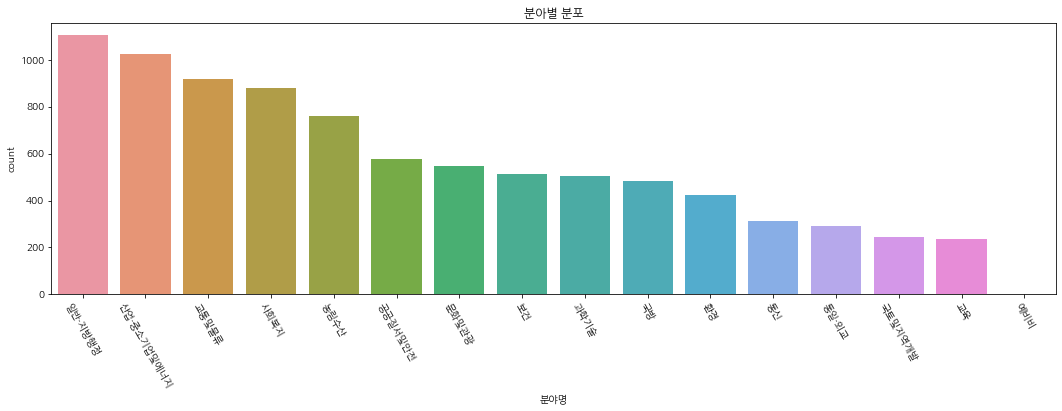

In [77]:
fig,ax = plt.subplots(1,1,figsize=(18,5))
sub_df = df.groupby('분야명',as_index=False)['세부사업명'].count().sort_values('세부사업명',ascending=False)
sns.barplot(data=sub_df,x='분야명',y='세부사업명').set(title='분아별 분포',ylabel='count')
g=ax.set_xticklabels(ax.get_xticklabels(),rotation=-60)

[Text(0.5, 1.0, '소관별 지출집행 top10'), Text(0.5, 0, 'count')]

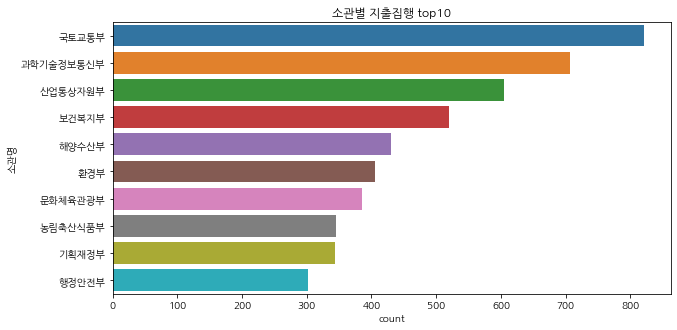

In [102]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sub_df = df.groupby('소관명',as_index=False)['세부사업명'].count().sort_values('세부사업명',ascending=False)
sns.barplot(data=sub_df.head(10),y='소관명',x='세부사업명').set(title='소관별 지출집행 top10',xlabel='count')

<AxesSubplot: title={'center': '회계 종류별 지출집행 top10'}, ylabel='세부사업명'>

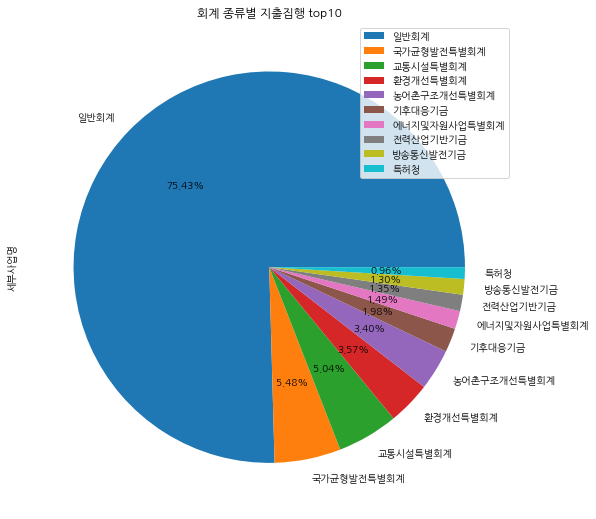

In [100]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df.groupby('회계명',as_index=False)['세부사업명'].count().sort_values('세부사업명',ascending=False).head(10)
sub_df.plot.pie(y='세부사업명',labels=sub_df['회계명'].values,autopct='%.2f%%',ax=ax,title='회계 종류별 지출집행 top10')

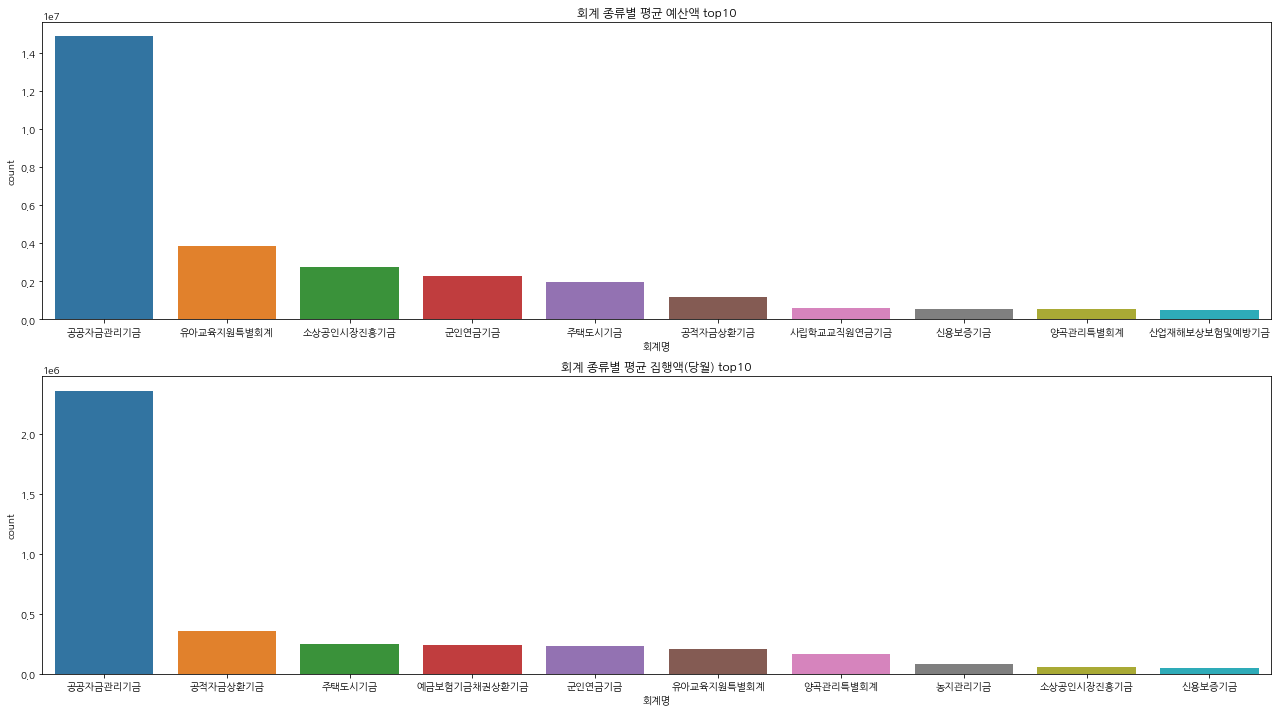

In [112]:
fig,axes = plt.subplots(2,1,figsize=(18,10))
sub_df1 = df.groupby('회계명',as_index=False)['예산액'].mean().sort_values('예산액',ascending=False)
sub_df2 = df.groupby('회계명',as_index=False)['집행액(당월)'].mean().sort_values('집행액(당월)',ascending=False)
sns.barplot(data=sub_df1.head(10),x='회계명',y='예산액',ax=axes[0]).set(title='회계 종류별 평균 예산액 top10',ylabel='count')
sns.barplot(data=sub_df2.head(10),x='회계명',y='집행액(당월)',ax=axes[1]).set(title='회계 종류별 평균 집행액(당월) top10',ylabel='count')
plt.tight_layout()

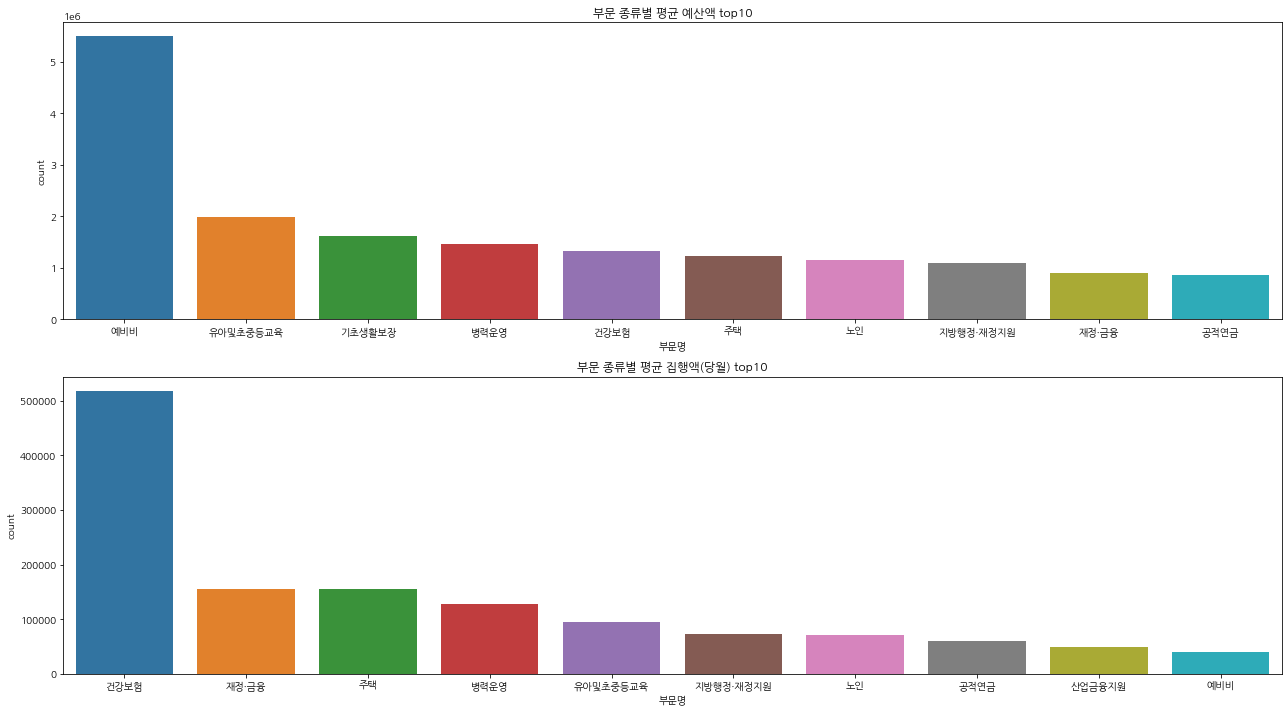

In [111]:
fig,axes = plt.subplots(2,1,figsize=(18,10))
sub_df1 = df.groupby('부문명',as_index=False)['예산액'].mean().sort_values('예산액',ascending=False)
sub_df2 = df.groupby('부문명',as_index=False)['집행액(당월)'].mean().sort_values('집행액(당월)',ascending=False)
sns.barplot(data=sub_df1.head(10),x='부문명',y='예산액',ax=axes[0]).set(title='부문 종류별 평균 예산액 top10',ylabel='count')
sns.barplot(data=sub_df2.head(10),x='부문명',y='집행액(당월)',ax=axes[1]).set(title='부문 종류별 평균 집행액(당월) top10',ylabel='count')
plt.tight_layout()

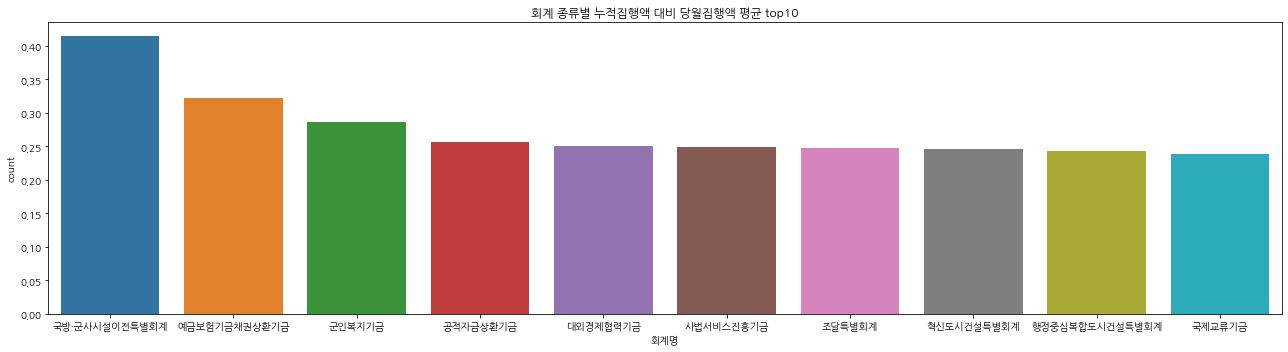

In [122]:
fig,ax = plt.subplots(1,1,figsize=(18,5))
df['누적집행액 대비 당월집행액'] = df['집행액(당월)']/df['집행액(연누계)']
sub_df1 = df.groupby('회계명',as_index=False)['누적집행액 대비 당월집행액'].mean().sort_values('누적집행액 대비 당월집행액',ascending=False)
sns.barplot(data=sub_df1.head(10),x='회계명',y='누적집행액 대비 당월집행액',ax=ax).set(title='회계 종류별 누적집행액 대비 당월집행액 평균 top10',ylabel='count')
plt.tight_layout()

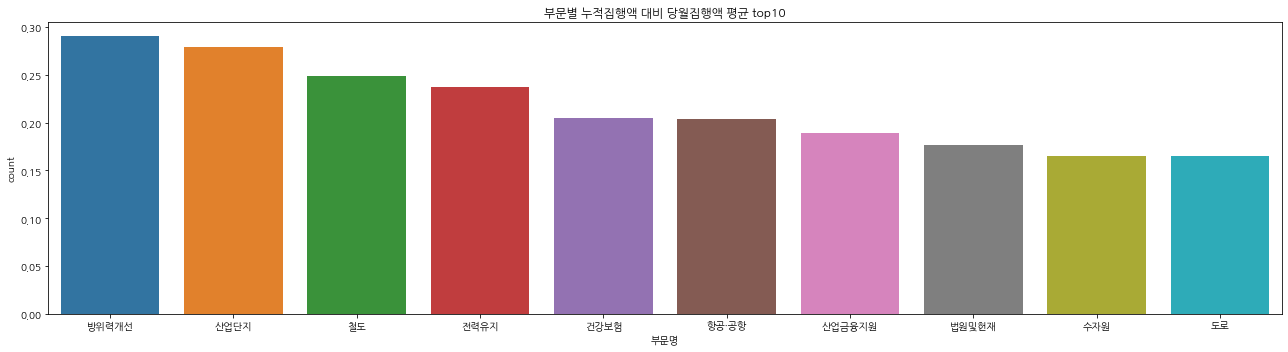

In [120]:
fig,ax = plt.subplots(1,1,figsize=(18,5))
df['누적집행액 대비 당월집행액'] = df['집행액(당월)']/df['집행액(연누계)']
sub_df1 = df.groupby('부문명',as_index=False)['누적집행액 대비 당월집행액'].mean().sort_values('누적집행액 대비 당월집행액',ascending=False)
sns.barplot(data=sub_df1.head(10),x='부문명',y='누적집행액 대비 당월집행액',ax=ax).set(title='부문별 누적집행액 대비 당월집행액 평균 top10',ylabel='count')
plt.tight_layout()